In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def load_data(file):
    df = pd.read_csv(file)
    #df = df.drop_duplicates(inplace=True)
    return df
donne = load_data("./donne/train.csv")   

In [17]:
donne

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: xlabel='None', ylabel='Age'>

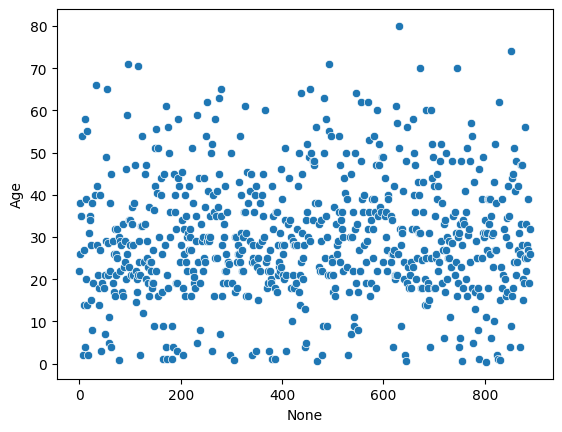

In [5]:
sns.scatterplot(x = donne.index, y = donne['Age'])

<Axes: xlabel='Age'>

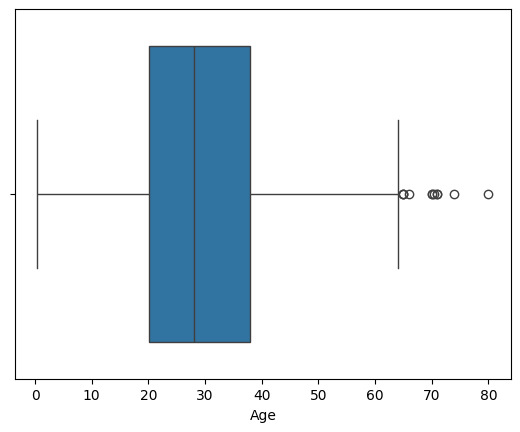

In [6]:
sns.boxplot(x = donne['Age'])

In [7]:
qs = donne['Age'].quantile([0.25,0.5,0.75]).values
q1 = qs[0]
q2 = qs[1]
q3 = qs[2]
iqr = q3-q1
l_inf = q1 - (1.5 * iqr)
l_sup = q3 + (1.5 *iqr)

l_inf
l_sup
donne_trimmed =donne.query(" Age >= @l_inf and Age <= @l_sup")

donne_trimmed['Age'].shape

array([20.125, 28.   , 38.   ])

<Axes: xlabel='Age'>

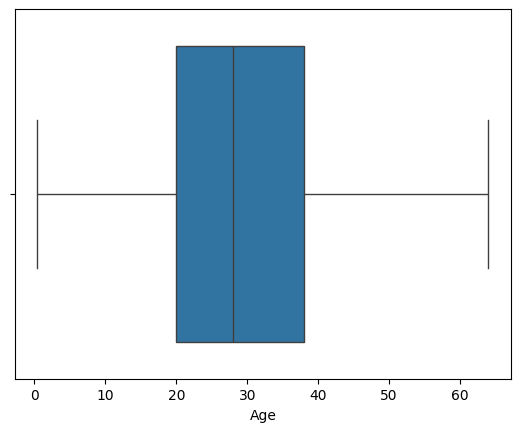

In [12]:
sns.boxplot(x = donne_trimmed['Age'])

Función para aplicar la eliminación de valores atipicos 

In [8]:
#FUNCIÓN A: Eliminación de intercuantiles.

def delete_outliers(file):
    qs_f = file['Age'].quantile([0.25,0.5,0.75]).values
    q1_f = qs_f[0]
    q2_f = qs_f[1]
    q3_f = qs_f[2]
    iqr_f = q3_f-q1_f
    l_inf_f = q1_f - (1.5 * iqr_f)
    l_sup_f = q3_f + (1.5 *iqr_f)
    donne_trimmed_f =file.query(" Age >= @l_inf_f and Age <= @l_sup_f")
    a = file['Age'].shape
    b = donne_trimmed_f['Age'].shape
    message = print(f'el tamaño del dataset antes:{a} \n  el tamaño del data set después: {b}')
    return donne_trimmed_f


In [11]:

r = delete_outliers(femmes)


el tamaño del dataset antes:(891,) 
  el tamaño del data set después: (703,)


In [7]:
# Crear DataFrames de ejemplo
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Nombre': ['Ana', 'Juan', 'María']})
df2 = pd.DataFrame({'ID': [4, 5, 6], 'Nombre': ['Pedro', 'Laura', 'Carlos']})

# Unir verticalmente (apilar)
resultado = pd.concat([df1, df2], axis=0)
resultado

,ID,Nombre
0,1,Ana
1,2,Juan
2,3,María
0,4,Pedro
1,5,Laura
2,6,Carlos


FUNCIÓN GENERAL, FILTRADO POR TIPO DE DIVISA, APLICANDO LA ELIMINACIÓN DE 
OUTLIERS, Y CONCATENANDO LAS TABLAS EN UNA GENRAL


In [14]:
hommes = donne.query('Sex == "male"')
femmes = donne.query('Sex == "female"')

In [16]:
r = delete_outliers(hommes)

el tamaño del dataset antes:(577,) 
  el tamaño del data set después: (446,)


In [5]:
print(f'tamaño de hommes antes de:{len(hommes)}, \n tamaño de femmes antes:{len(femmes)}')

tamaño de hommes antes de:577, 
 tamaño de femmes antes:314


<Axes: xlabel='Age'>

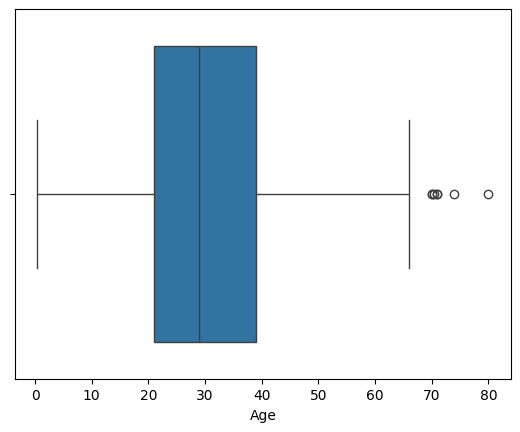

In [23]:
sns.boxplot(x = hommes['Age'])

<Axes: xlabel='Age'>

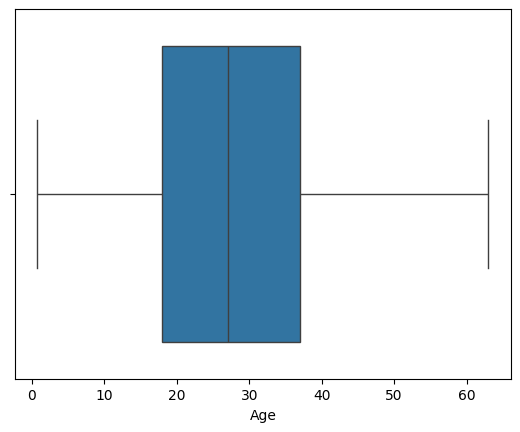

In [24]:
sns.boxplot(x = femmes['Age'])

In [5]:
#RECORRER LOS VALORES DE LA VARIABLE CATEGORICA. 
genero = donne['Sex'].unique()

for tipo in genero:
    cuadro = donne.query('Sex == @tipo')
    print(tipo)



male
female


In [10]:
p = 'male'
donne.query('Sex == @p')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# CICLO B : CONCATENAR TABLAS TRATADAS
# Inicializa un DataFrame vacío para almacenar las tablas concatenadas
resultado_final = pd.DataFrame()

# Supongamos que tienes algunas tablas de ejemplo (puedes reemplazar esto con tus propias tablas)
'''tabla1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
tabla2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})
tabla3 = pd.DataFrame({'A': [9, 10], 'B': [11, 12]})
'''
# Lista de tablas de ejemplo
tablas = [hommes,femmes]

# Variable para controlar si ya se ha agregado el encabezado
encabezado_agregado = False  


# Ciclo for para concatenar las tablas verticalmente
for i, tabla in enumerate(tablas):
    # Si es la primera iteración, agrega el encabezado de las columnas
    if not encabezado_agregado:
        resultado_final = pd.concat([resultado_final, tabla], axis=0, ignore_index=True)
        encabezado_agregado = True
    else:
        # Concatena verticalmente (axis=0) sin incluir el índice
        resultado_final = pd.concat([resultado_final, tabla], axis=0, ignore_index=True)

# El resultado final es un solo DataFrame que contiene todas las tablas concatenadas verticalmente con un solo encabezado
# Imprime o utiliza resultado_final según sea necesario
print(resultado_final)

NameError: name 'hommes' is not defined

In [40]:
resultado =pd.concat([hommes,femmes], axis=0)
resultado

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Función ejemplo, para el trabajo.